#**Automatización del Análisis de Solicitudes de Tarjetas de Crédito**

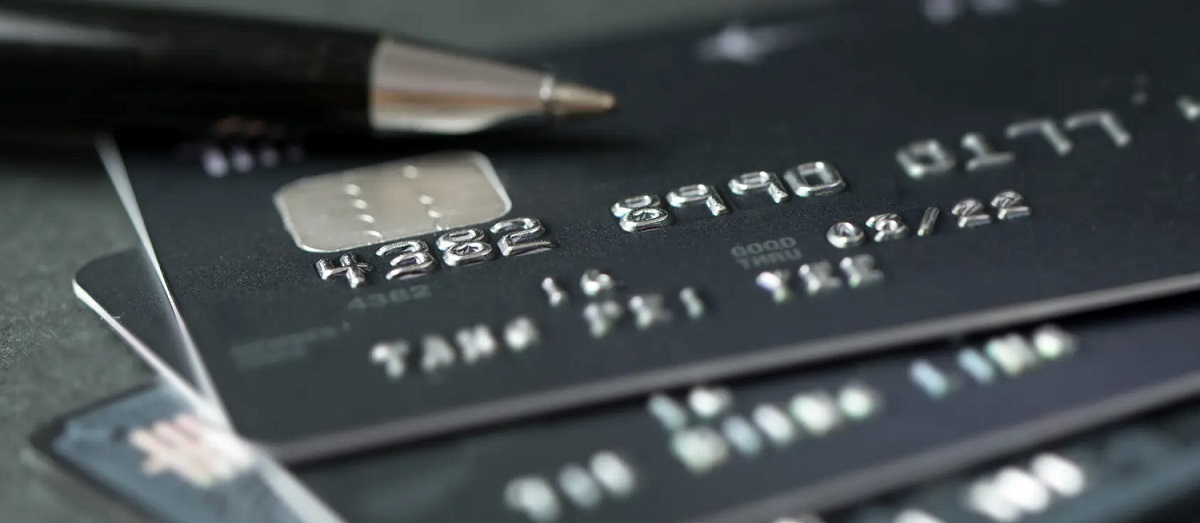

###**Contexto**

Las entidades financieras reciben mensualmente muchas solicitudes de tarjetas de crédito. Varias de ellas son rechazadas por diferentes motivos, altos montos pendientes de  préstamos personales, bajos niveles de ingresos o un historial de pagos con varios atrasos.
Analizar en forma manual estas solicitudes es una tarea que insume tiempo y dinero, además de que se pueden cometer errores de apreciación. 
Afortunadamente, este es un tipo de tarea que se puede automatizar a través de un proceso de machine learning, por lo tanto, en este caso de estudio vamos a construir un predictor para determinar si es factible o no otorgar una tarjeta de crédito a un cliente.


###**Inspección del dataset**

El dataset se obtuvo del repositorio UCI, disponible en el siguiente link: http://archive.ics.uci.edu/ml/datasets/Credit+Approval.
Es un dataset interesante porque tiene atributos de diferentes tipos, numéricos reales, numéricos enteros, nominales con pocos valores diferentes y nominales con gran variedad de valores. También hay algunos datos faltantes. 
.
El mismo contiene información acerca de solicitudes de tarjetas de crédito, pero por tratarse de información confidencial, el autor sustituye los datos reales por valores ficticios, incluso el nombre de los atributos fue enmascarado.
Si bien se puede crear un modelo utilizando los datos como están, es más fácil de interpretar y significativo tener los nombres reales de los atributos.
En base a modelos o plantillas de solicitudes similares, es posible identificar cada atributo para asociar su nombre correspondiente.




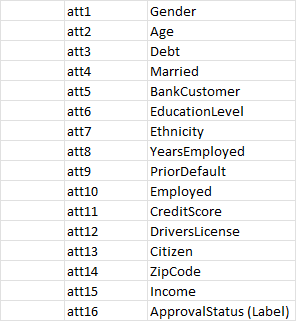

La descripción de los atributos provista por RapidMiner es la siguiente: 

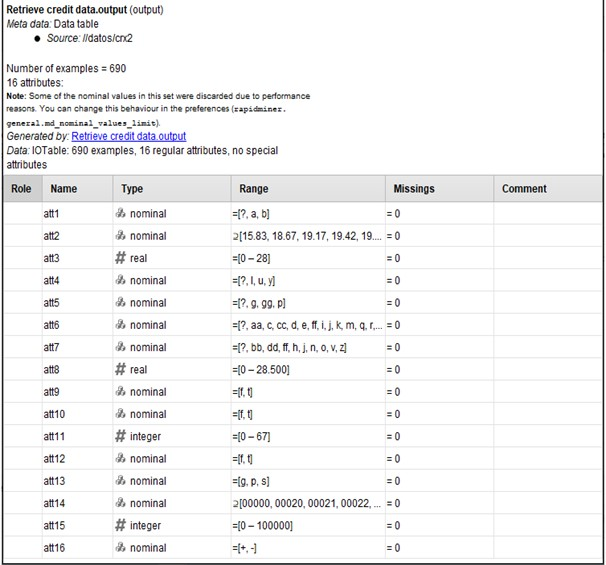

Si bien la columna Missings informa que no existen valores faltantes, en realidad en el dataset se marcan con el símbolo ‘?’. Esto a su vez acarrea otro problema, y es que le cambia el tipo de dato al atributo. En lugar de ser numérico, al encontrar un caracter lo marca como nominal, aunque se trate de valores reales o enteros.
Por lo tanto es necesario hacer una transformación previa tanto en los valores del dataset como en los tipos inferidos por RapidMiner, para poder procesar los datos y generar el modelo correctamente.


###**Transformación de datos**

####*Renombrado de atributos*

Los atributos se renombran con el operador Rename attributes en función de lo anteriormente detallado. 







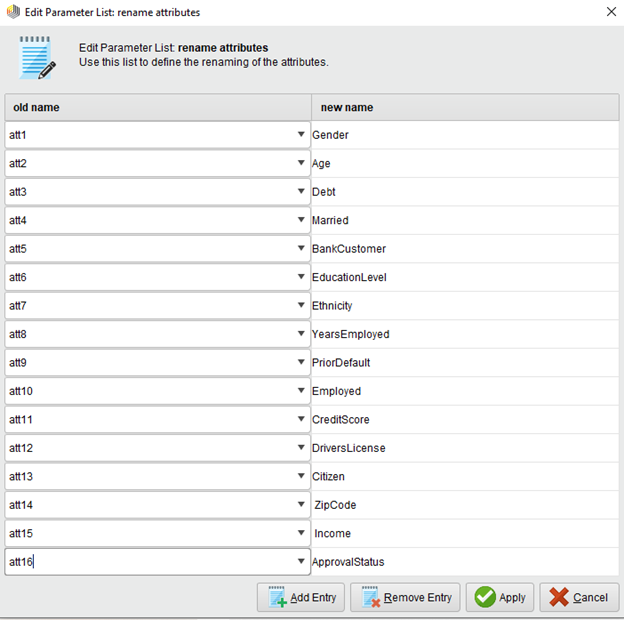

####*Missing values*

En primer lugar se eligen todos los atributos y se sustituyen las ocurrencias del valor “?” por null, de esa forma los valores faltantes se identifican correctamente y es posible procesarlos más adelante.
La sustitución se hace con el operador Replace y la expresión regular [?], dejando vacío el campo con el nuevo valor.


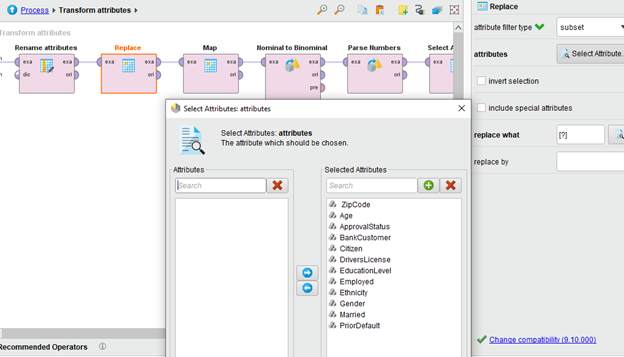

Ahora sí RapidMiner puede identificar las columnas con valores faltantes

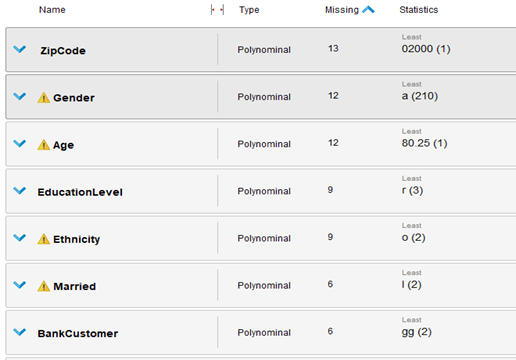

Mediante el operador Replace Missing Values se reemplazan los valores que faltan, en el caso de campos numéricos se utiliza la media y para los nominales el valor más frecuente. (parámetro avg en ambos casos).

####*Otras transformaciones*

El bloque Transform Attributes, además del renombrado y sustitución de valores en atributos ya vistos, realiza otras operaciones para preparar el dataset.
Dichas operaciones son:

Map: Se utiliza para renombrar el valor “+” por YES y “-” por NO del label del dataset. Si bien  
no es un cambio significativo el objetivo es tener una salida más clara  nemotécnica

Nominal to Binomial: El objetivo es cambiar el tipo de dato de algunos atributos para ayudar al modelo a tomar mejores decisiones. Luego de la eliminación de valores, varios campos quedaron como polinomiales cuando en realidad solo tenían dos valores diferentes.

Select Attributes: El campo ZIpCode no parece ser muy relevante, es decir, no agrega información del cliente que pueda influir en la decisión, por lo cual se elimina del dataset.

Parse Number: El campo Age estaba identificado como nominal por los valores “?”, es decir, números representados como strings, por eso es necesario transformar el tipo a numérico.


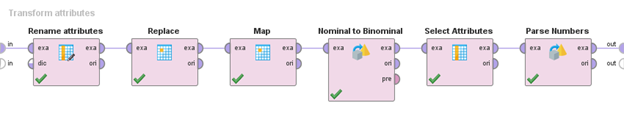

####*Discretización*

Se discretizan valores numéricos en 3 buckets mediante el operador Discretize By Binning. Por lo tanto, los rangos de los atributos se dividen en tres particiones iguales. Varios algoritmos tienen mejor performance cuando las distribuciones de sus datos numéricos se hacen discretas, se utiliza este operador para ver cómo se comporta el modelo con y sin esta transformación.

###**Predicción y evaluación de performance**

Para simplificar el proceso de entrenamiento, training y evaluación de performance se utiliza el operador Cross Validation el cual realiza una validación cruzada de 15 iteraciones. Esto significa que el conjunto de datos se divide en 15 subconjuntos, y en cada iteración, uno de los subconjuntos se utiliza como datos de prueba y el resto como datos de entrenamiento. El proceso de validación cruzada es repetido durante 15 veces, con cada uno de los posibles subconjuntos de datos de prueba. Finalmente se realiza la media aritmética de los resultados de cada iteración para obtener un único resultado.
Se eligen tres modelos diferentes para comparar su performance: Naive Bayes, k-NN y Decision Trees. A su vez, se comparan también los resultados cuando se discretizan los valores y cuando no. Esto se logra deshabilitando el operador Discretize.


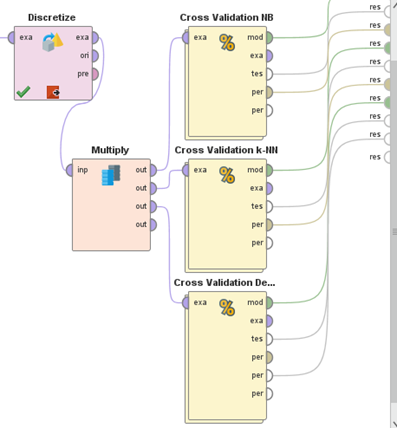

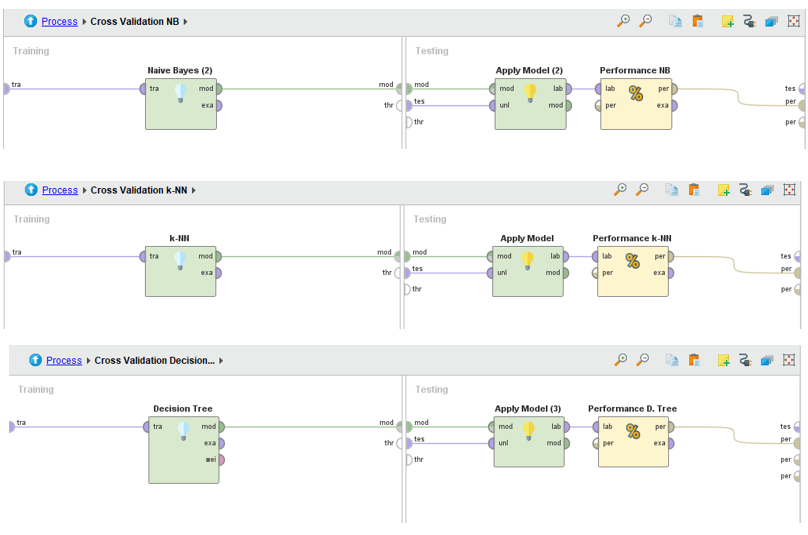

Luego de ejecutar el proceso completo los resultados son los siguientes:

#####**k-NN**

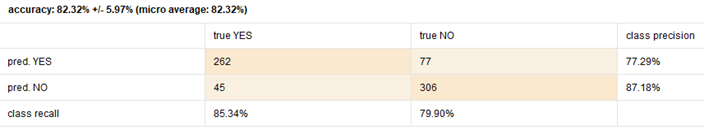

#####**Decision Trees**

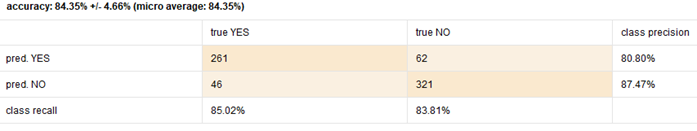


#####**Naive Bayes**

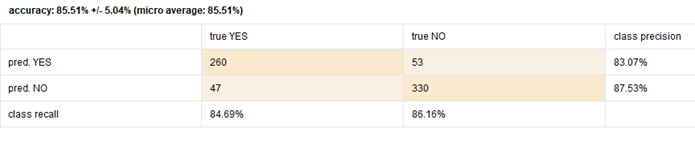

###**Resultados**


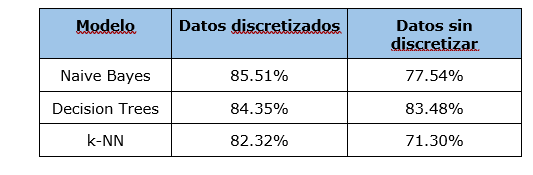

Los valores obtenidos muestran que cuando los datos se discretizan el modelo con mejor precisión es Naive Bayes. Cuando esto no sucede, se produce un descenso significativo tanto en este modelo como en k-NN. Sin embargo el árbol de decisión mantiene su performance prácticamente en el mismo porcentaje.